In [1]:
# simple statistical analysis
# Author: Grace Guan 12/12/17

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# import the datasets
df14 = pd.read_csv("2014_final_losscalc.csv", low_memory=False)
df15 = pd.read_csv("2015_final_losscalc.csv", low_memory=False)

# remove errors
df14 = df14.replace(['#DIV/0!', '#VALUE!', 'N/E', '$-', 'N/A_MA_Issuer', 'N/A_DefaultCharge'], np.nan)
df15 = df15.replace(['#DIV/0!', '#VALUE!', 'N/E', '$-', 'N/A_MA_Issuer', 'N/A_DefaultCharge'], np.nan)

In [5]:
combined = pd.merge(df14, df15, on='HIOSIssuerID:')

#combined.to_csv("combined.csv")

In [11]:
df1 = pd.read_csv("combinedrelevant.csv")
# remove errors
df1 = df1.replace(['#DIV/0!', '#VALUE!', 'N/E', '$-', 'N/A_MA_Issuer', 'N/A_DefaultCharge'], np.nan)

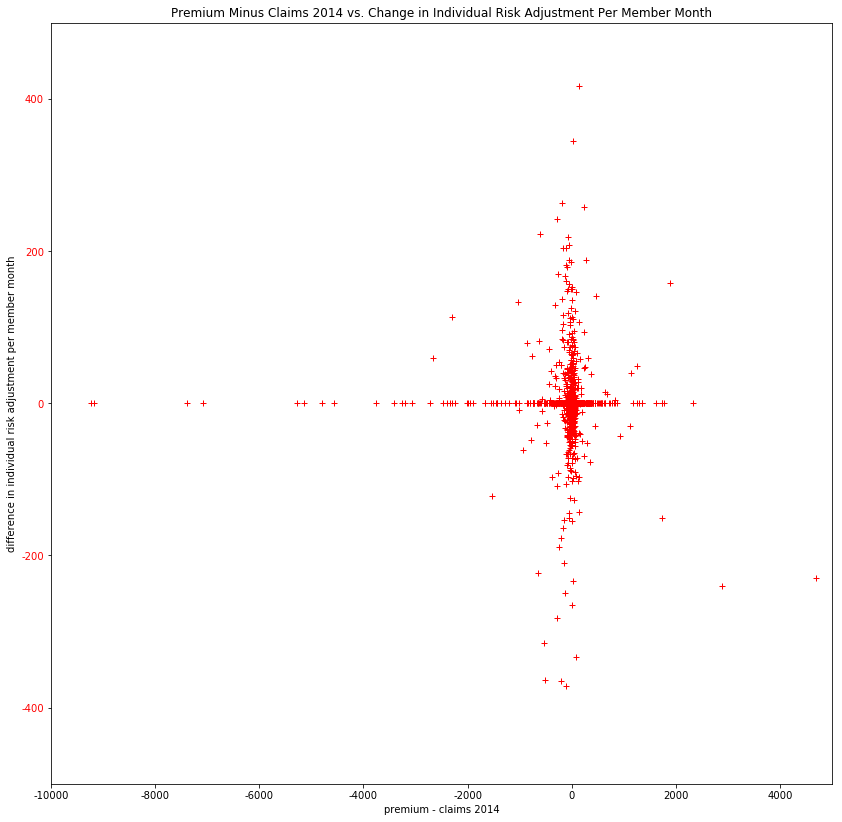

In [17]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax1 = plt.subplots(figsize=(14, 14))
ax1.set_title('Premium Minus Claims 2014 vs. Change in Individual Risk Adjustment Per Member Month')

ax1.plot(df1["TotalProfitPMM"], 
         df1["DifferenceInIRAPMM"], '+', color='r')
ax1.set_xlabel('premium - claims 2014')
ax1.set_ylabel('difference in individual risk adjustment per member month')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax1, 'r')

ax1.set_xlim([-10000,5000])
ax1.set_ylim([-500,500])
plt.show()

In [25]:
correlation = df1[["TotalProfitPMM", "DifferenceInIRAPMM"]].dropna(how='any')

In [26]:
from scipy.stats.stats import pearsonr   
a = [1,4,6]
b = [1,2,3]   
print(pearsonr(a,b))

print(pearsonr(pd.to_numeric(correlation["TotalProfitPMM"]), pd.to_numeric(correlation["DifferenceInIRAPMM"])))

(0.99339926779878274, 0.073186395040328034)
(0.00062799661884443329, 0.98102390913094994)
